In [3]:
import pandas as pd
df = pd.read_csv("kelulusan_mahasiswa.csv")
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IPK                30 non-null     float64
 1   Jumlah_Absensi     30 non-null     int64  
 2   Waktu_Belajar_Jam  30 non-null     int64  
 3   Lulus              30 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 1.1 KB
None
   IPK  Jumlah_Absensi  Waktu_Belajar_Jam  Lulus
0  3.8               2                 12      1
1  2.5              10                  3      0
2  3.4               4                  8      1
3  2.1              11                  2      0
4  3.9               1                 14      1


IPK                  0
Jumlah_Absensi       0
Waktu_Belajar_Jam    0
Lulus                0
dtype: int64


<Axes: xlabel='IPK'>

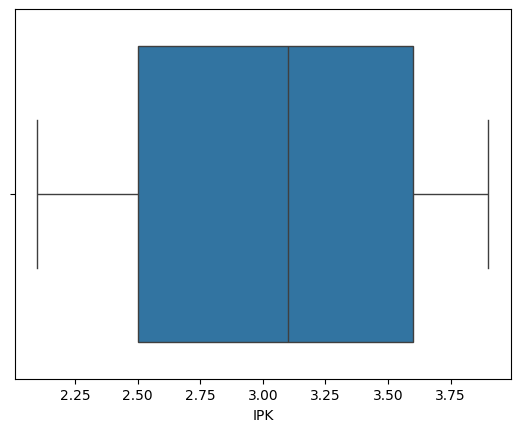

In [4]:
print(df.isnull().sum())
df = df.drop_duplicates()

import seaborn as sns
sns.boxplot(x=df['IPK'])

             IPK  Jumlah_Absensi  Waktu_Belajar_Jam      Lulus  Rasio_Absensi  \
count  29.000000       29.000000          29.000000  29.000000      29.000000   
mean    3.031034        6.344828           6.758621   0.517241       0.453202   
std     0.611849        3.497712           4.146041   0.508548       0.249837   
min     2.100000        1.000000           1.000000   0.000000       0.071429   
25%     2.500000        3.000000           3.000000   0.000000       0.214286   
50%     3.100000        6.000000           7.000000   1.000000       0.428571   
75%     3.600000        9.000000          10.000000   1.000000       0.642857   
max     3.900000       12.000000          14.000000   1.000000       0.857143   

       IPK_x_Study  
count    29.000000  
mean     22.834483  
std      16.967054  
min       2.100000  
25%       7.200000  
50%      21.700000  
75%      34.000000  
max      54.600000  


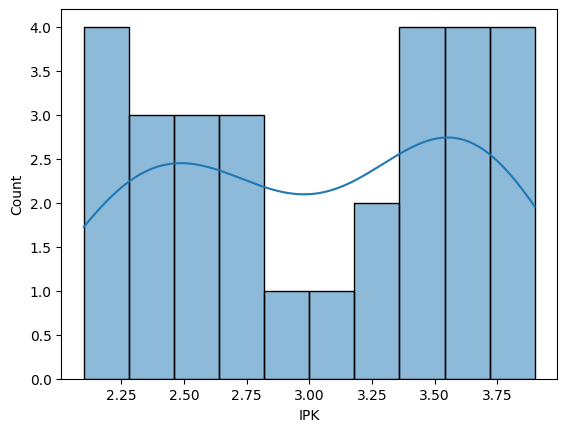

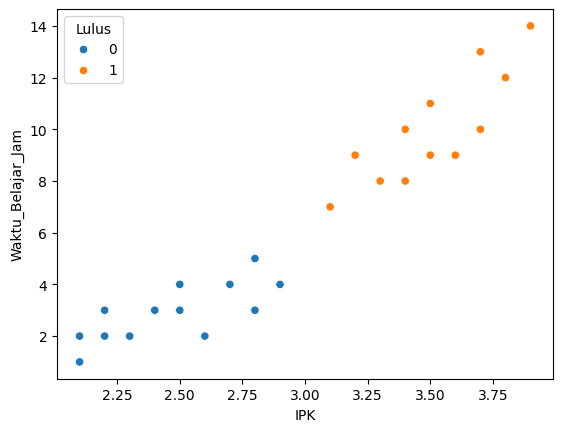

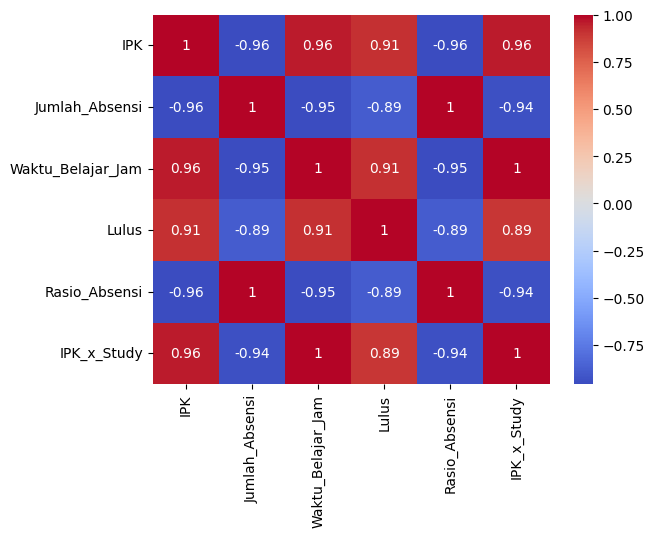

In [13]:
import matplotlib.pyplot as plt

print(df.describe())
sns.histplot(df['IPK'], bins=10, kde=True)
plt.show()
sns.scatterplot(x='IPK', y='Waktu_Belajar_Jam', data=df, hue='Lulus')
plt.show()
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [7]:
df['Rasio_Absensi'] = df['Jumlah_Absensi'] / 14
df['IPK_x_Study'] = df['IPK'] * df['Waktu_Belajar_Jam']
df.to_csv("processed_kelulusan.csv", index=False)

In [8]:
from sklearn.model_selection import train_test_split

X = df.drop('Lulus', axis=1)
y = df['Lulus']

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape)

(20, 5) (4, 5) (5, 5)
